In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")

In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [7]:
df.stroke.value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [8]:
## bm data is missing so we can repace with avg bmi value
df['bmi'].fillna(df['bmi'].mean(),inplace=True)

In [9]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [10]:
## select all the non binary column
df.select_dtypes(include=["object"]).head()

,gender,ever_married,work_type,Residence_type,smoking_status
0,Male,Yes,Private,Urban,formerly smoked
1,Female,Yes,Self-employed,Rural,never smoked
2,Male,Yes,Private,Rural,never smoked
3,Female,Yes,Private,Urban,smokes
4,Female,Yes,Self-employed,Rural,never smoked


**If the caregory is binary then you do the level encoding because its jusy 0 andn 1. but if the caregory is more then 2 like 3 4 or 5 you will do one hot encoding because other wise if you do level encoding in this case then suppose it level it like 0,1,2,3 . Now 3 is higher than 1 or 2 so is it significant than than the 1 ? no . it is just a category . so do one hot encoding**

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [12]:
## level encoder for binary encoder
df["gender"] = le.fit_transform(df['gender'])
df["ever_married"] = le.fit_transform(df['ever_married'])
df["Residence_type"] = le.fit_transform(df['Residence_type'])


In [13]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,Private,1,228.69,36.600000,formerly smoked,1
1,51676,0,61.0,0,0,1,Self-employed,0,202.21,28.893237,never smoked,1
2,31112,1,80.0,0,1,1,Private,0,105.92,32.500000,never smoked,1
3,60182,0,49.0,0,0,1,Private,1,171.23,34.400000,smokes,1
4,1665,0,79.0,1,0,1,Self-employed,0,174.12,24.000000,never smoked,1


In [14]:
## now we do the once hot encoding
work_type_ohe = pd.get_dummies(df.work_type,prefix = "work")
work_type_ohe.head()

,work_Govt_job,work_Never_worked,work_Private,work_Self-employed,work_children
0,0,0,1,0,0
1,0,0,0,1,0
2,0,0,1,0,0
3,0,0,1,0,0
4,0,0,0,1,0


In [15]:
smoking_status_ohe = pd.get_dummies(df.smoking_status, prefix= "smoking")
smoking_status_ohe.head()

,smoking_Unknown,smoking_formerly smoked,smoking_never smoked,smoking_smokes
0,0,1,0,0
1,0,0,1,0
2,0,0,1,0
3,0,0,0,1
4,0,0,1,0


In [16]:
df = pd.concat([df,work_type_ohe ],axis = 1)
df = pd.concat([df,smoking_status_ohe ],axis = 1)

In [17]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,...,stroke,work_Govt_job,work_Never_worked,work_Private,work_Self-employed,work_children,smoking_Unknown,smoking_formerly smoked,smoking_never smoked,smoking_smokes
0,9046,1,67.0,0,1,1,Private,1,228.69,36.600000,...,1,0,0,1,0,0,0,1,0,0
1,51676,0,61.0,0,0,1,Self-employed,0,202.21,28.893237,...,1,0,0,0,1,0,0,0,1,0
2,31112,1,80.0,0,1,1,Private,0,105.92,32.500000,...,1,0,0,1,0,0,0,0,1,0
3,60182,0,49.0,0,0,1,Private,1,171.23,34.400000,...,1,0,0,1,0,0,0,0,0,1
4,1665,0,79.0,1,0,1,Self-employed,0,174.12,24.000000,...,1,0,0,0,1,0,0,0,1,0


In [18]:
df.drop(["work_type","smoking_status"],axis = 1,inplace=True)

In [19]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_Govt_job,work_Never_worked,work_Private,work_Self-employed,work_children,smoking_Unknown,smoking_formerly smoked,smoking_never smoked,smoking_smokes
0,9046,1,67.0,0,1,1,1,228.69,36.600000,1,0,0,1,0,0,0,1,0,0
1,51676,0,61.0,0,0,1,0,202.21,28.893237,1,0,0,0,1,0,0,0,1,0
2,31112,1,80.0,0,1,1,0,105.92,32.500000,1,0,0,1,0,0,0,0,1,0
3,60182,0,49.0,0,0,1,1,171.23,34.400000,1,0,0,1,0,0,0,0,0,1
4,1665,0,79.0,1,0,1,0,174.12,24.000000,1,0,0,0,1,0,0,0,1,0


In [20]:
## the data is not scaled if take a look of the dadt frame age glucose and hypetension is in other range this will cause problem
## to out network we need to scale it

In [21]:
from sklearn.preprocessing import StandardScaler
clmn = ["age","avg_glucose_level","bmi"]
std = StandardScaler()
scaled_data = std.fit_transform(df[clmn])

In [22]:
scaled_data

array([[ 1.05143428e+00,  2.70637544e+00,  1.00123401e+00],
       [ 7.86070073e-01,  2.12155854e+00,  4.61555355e-16],
       [ 1.62639008e+00, -5.02830130e-03,  4.68577254e-01],
       ...,
       [-3.63841511e-01, -5.11442636e-01,  2.21736316e-01],
       [ 3.43796387e-01,  1.32825706e+00, -4.27845098e-01],
       [ 3.42048064e-02, -4.60867458e-01, -3.49895329e-01]])

In [23]:
scled = pd.DataFrame(scaled_data,columns=clmn)

In [24]:
scled.head()

,age,avg_glucose_level,bmi
0,1.051434,2.706375,1.001234e+00
1,0.786070,2.121559,4.615554e-16
2,1.626390,-0.005028,4.685773e-01
3,0.255342,1.437358,7.154182e-01
4,1.582163,1.501184,-6.357112e-01


In [28]:
df.drop(["id","age","avg_glucose_level","bmi"],axis=1,inplace=True)
df = pd.concat([df,scled],axis = 1)


In [29]:
df.head()

,gender,hypertension,heart_disease,ever_married,Residence_type,stroke,work_Govt_job,work_Never_worked,work_Private,work_Self-employed,work_children,smoking_Unknown,smoking_formerly smoked,smoking_never smoked,smoking_smokes,age,avg_glucose_level,bmi
0,1,0,1,1,1,1,0,0,1,0,0,0,1,0,0,1.051434,2.706375,1.001234e+00
1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0.786070,2.121559,4.615554e-16
2,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,1.626390,-0.005028,4.685773e-01
3,0,0,0,1,1,1,0,0,1,0,0,0,0,0,1,0.255342,1.437358,7.154182e-01
4,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0,1.582163,1.501184,-6.357112e-01


In [30]:
from sklearn.model_selection import train_test_split
X = df.drop("stroke",axis = 1)
Y = df[["stroke"]]

In [32]:
x_train,x_test,y_train,y_test = train_test_split(X,Y)

In [33]:
Y.head()

,stroke
0,1
1,1
2,1
3,1
4,1


In [35]:
## data is imbalanced so we need to make it equal with SMOTE
## here is how you find data is imbalanced
df.stroke.value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [36]:
## now we only level the training data . test data remain as it is

**SMOTE** (synthetic minority oversampling technique) is one of the most commonly used oversampling methods to solve the imbalance problem. It aims to balance class distribution by randomly increasing minority class examples by replicating them. SMOTE synthesises new minority instances between existing minority instances

In [38]:
from imblearn.over_sampling import SMOTE

In [56]:
sm = SMOTE()
x_train_sm,y_train_sm = sm.fit_resample(x_train,y_train)

In [62]:
y_train_sm[y_train_sm == 0].count()

stroke    3646
dtype: int64

In [63]:
y_train_sm[y_train_sm == 0].count()

stroke    3646
dtype: int64

In [64]:
## data is balanded based on the target and equal
x_train_sm.shape

(7292, 17)

In [66]:
from keras.models import Sequential
from keras.layers import Dense

In [67]:
model = Sequential()
# input layer
model.add(Dense(12,input_dim = x_train_sm.shape[1],activation = "relu"))

In [68]:
model.add(Dense(8,activation = "relu"))

In [69]:
model.add(Dense(1,activation = "sigmoid"))

In [70]:
model.compile(loss = "binary_crossentropy",optimizer="Adam")

In [71]:
model.fit(x_train_sm,y_train_sm,epochs=25)

Epoch 1/25
228/228 [==============================] - 3s 3ms/step - loss: 0.5988
Epoch 2/25
228/228 [==============================] - 1s 4ms/step - loss: 0.4547
Epoch 3/25
228/228 [==============================] - 1s 6ms/step - loss: 0.4257
Epoch 4/25
228/228 [==============================] - 1s 5ms/step - loss: 0.4110
Epoch 5/25
228/228 [==============================] - 1s 2ms/step - loss: 0.3983
Epoch 6/25
228/228 [==============================] - 0s 2ms/step - loss: 0.3874
Epoch 7/25
228/228 [==============================] - 0s 2ms/step - loss: 0.3784
Epoch 8/25
228/228 [==============================] - 0s 2ms/step - loss: 0.3693
Epoch 9/25
228/228 [==============================] - 0s 2ms/step - loss: 0.3603
Epoch 10/25
228/228 [==============================] - 0s 2ms/step - loss: 0.3524
Epoch 11/25
228/228 [==============================] - 0s 2ms/step - loss: 0.3441
Epoch 12/25
228/228 [==============================] - 0s 2ms/step - loss: 0.3361
Epoch 13/25
228/228 [====

In [72]:
y_pred = model.predict(x_test)

40/40 [==============================] - 1s 4ms/step


In [74]:
## we got all the probability
y_pred

array([[0.03755598],
       [0.26124394],
       [0.00619247],
       ...,
       [0.04749002],
       [0.00179721],
       [0.14258206]], dtype=float32)

In [79]:
y_pred_solid = [1 if i>.5 else 0 for i in y_pred]

In [81]:
from sklearn.metrics import confusion_matrix,fbeta_score

In [82]:
confusion_matrix(y_test,y_pred_solid)

array([[988, 227],
       [ 26,  37]])

<Axes: >

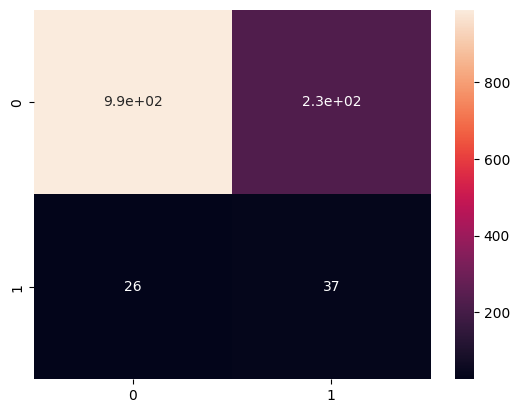

In [84]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test,y_pred_solid),annot=True)